## Observations and Insights 

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#get dimensions of the data frames

data1=mouse_metadata.count()
data2=study_results.count()

print(data1)
print(data2)


mouse_metadata.nunique()

study_results.nunique()
# Combine the data into a single dataset

df_merge = pd.merge(mouse_metadata, study_results, on='Mouse ID')

## This checks to make sure that the merge didn't drop any ids. I should have the same amount of ids
## on study_results

df_merge.count()

## This checks to make sure that the merge populated the repeated ids with the info from mouse_meta data instead 
## of nas

df_merge.head()

## double checks to make sure there are no NAs 

df_merge.isnull().values.any()

# Display the data table for preview

df_merge


Mouse ID        249
Drug Regimen    249
Sex             249
Age_months      249
Weight (g)      249
dtype: int64
Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.The number of mice is equal to the unique ID's in the meta data

mouse_metadata["Mouse ID"].nunique()


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_uni=df_merge [ ["Mouse ID", "Timepoint"]]


## returns only the data that is duplicated across multiple columns
mouse_uni[mouse_uni.duplicated(keep=False)]


,Mouse ID,Timepoint
908,g989,0
909,g989,0
910,g989,5
911,g989,5
912,g989,10
913,g989,10
914,g989,15
915,g989,15
916,g989,20
917,g989,20


In [180]:
# Optional: Get all the data for the duplicate mouse ID. 

Mouse_989=df_merge.loc[df_merge["Mouse ID"]=="g989"]
Mouse_989.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [176]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# sorting by ID 

df_merge.sort_values(["Mouse ID", "Timepoint"], inplace=True) 
  
# dropping ALL duplicte values. If you want o drop only the repeats you would use 'keep=last'
# df_merge.drop_duplicates(subset =["Mouse ID", "Timepoint"], keep= False, inplace = True)

#dropping only the g989

# Get names of indexes for which Mouse ID = g989
indexNames = df_merge[ df_merge['Mouse ID'] == 'g989' ].index
# Delete these row indexes from dataFrame
df_merge.drop(indexNames , inplace=True)

df_merge.count()

##Checking that duplicate values are removed but appropriate values remain

df_merge.loc[df_merge["Mouse ID"]=="g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [6]:
# Checking the number of mice in the clean DataFrame.I expected 5 rows to be removed for a count of 1880
df_merge.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
grouped=df_merge.groupby(["Drug Regimen"])

mean=grouped["Tumor Volume (mm3)"].mean()


medi=grouped["Tumor Volume (mm3)"].median()
var=grouped["Tumor Volume (mm3)"].var()
sd=grouped["Tumor Volume (mm3)"].std()
sem=grouped["Tumor Volume (mm3)"].sem()

Stat_Table=pd.concat([mean, medi,var, sd, sem], axis=1)

Stat_Table.columns=['Mean', 'Median','Variance', 'SD', 'SEM']

                         
Stat_Table.head(30)


,Mean,Median,Variance,SD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64


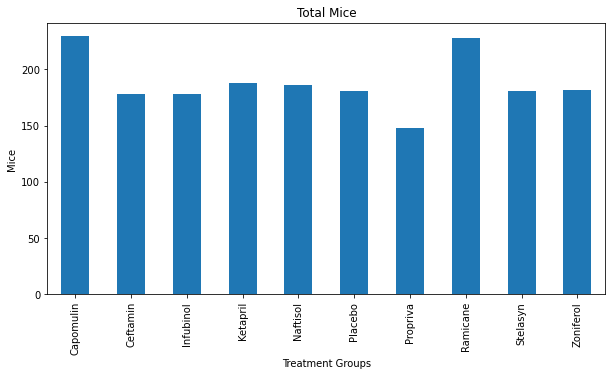

<Figure size 432x288 with 0 Axes>

In [128]:
# Generate a bar plot showing the total number of mice for each treatment 
#throughout the course of the study using pandas. 
#You have to put the data points together with the drug group 
#using Groupby Drug Regimen with .count and mouse id to determine the datapoints

Data_points = df_merge.groupby(["Drug Regimen"]).count()["Mouse ID"]
print(Data_points)


Data_points.plot(kind="bar", figsize=(10,5))

#set chart title
plt.title("Total Mice")
plt.xlabel("Treatment Groups")
plt.ylabel("Mice")

#show chart and set layout
plt.show()
plt.tight_layout()

Text(0, 0.5, 'Mice')

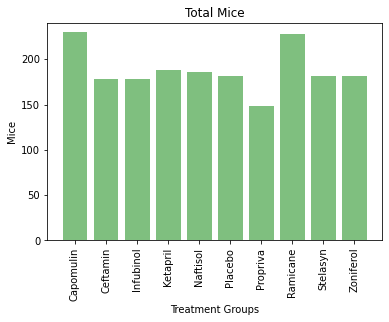

In [57]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

x_axis=np.arange(len(grouped["Drug Regimen"].unique()))

y_axis=grouped["Mouse ID"].count()

plt.bar(x_axis, y_axis, color='green', alpha=0.5, align="center")

#If you to shift the ticks 
#tick_locations = [value + 0 for value in x_axis]
tick_locations = [ value for value in x_axis]

#x_label=grouped["Drug Regimen"].unique

plt.xticks(tick_locations,[('Capomulin'),('Ceftamin'),('Infubinol'),('Ketapril'),('Naftisol'), ('Placebo'),
                           ('Propriva'), ('Ramicane'), ('Stelasyn'),('Zoniferol')], rotation="vertical")


plt.ylim(0, max(y_axis)+ 10)

plt.title("Total Mice")
plt.xlabel("Treatment Groups")
plt.ylabel("Mice")

        Total Mice
Sex               
Female         123
Male           125


Text(0.5, 1.0, 'Total Mice')

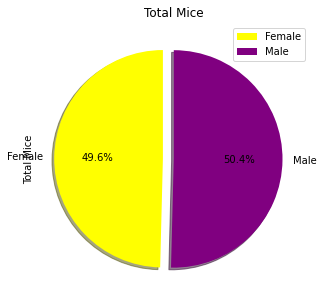

In [101]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#Group by ID and Sex
by_sex = df_merge.groupby(["Mouse ID","Sex"])

# transform groupby into df
mouse_sex_df = pd.DataFrame(by_sex.size())

#Create the dataframe with total count of Female and Male mice
mouse_sex = pd.DataFrame(mouse_sex_df.groupby(["Sex"]).count())
mouse_sex.columns = ["Total Mice"]

#sex_df
print(mouse_sex)

colors = ['yellow', 'purple']
explode = (0.1, 0)
plot = mouse_sex.plot.pie(y='Total Mice',figsize=(5,5), 
                             colors = colors, startangle=90, autopct="%1.1f%%",
                             explode = explode, shadow = True)

#set chart title
plt.title("Total Mice")


        Total Mice  Percentage of Sex
Sex                                  
Female         123          49.596774
Male           125          50.403226


Text(0.5, 1.0, 'Total Mice')

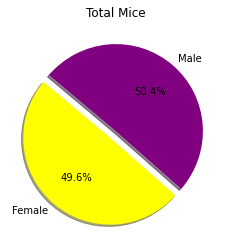

In [314]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

by_sex = df_merge.groupby(["Mouse ID","Sex"])

# transform groupby into df
mouse_sex_df = pd.DataFrame(by_sex.size())

#Create the dataframe with total count of Female and Male mice
mouse_sex = pd.DataFrame(mouse_sex_df.groupby(["Sex"]).count())
mouse_sex.columns = ["Total Mice"]

#create and format the percentage of female vs male
mouse_sex["Percentage of Sex"] = (100*(mouse_sex["Total Mice"]/mouse_sex["Total Mice"].sum()))

#format the "Percentage of Sex" column
mouse_sex["Percentage of Sex"] = mouse_sex["Percentage of Sex"]

#sex_df
print(mouse_sex)
labels=["Female", "Male"]
sizes=[49.596774,50.403226]
colors = ['yellow', 'purple']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

#set chart title
plt.title("Total Mice")



## Quartiles, Outliers and Boxplots

In [63]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

top_drugs = df_merge[df_merge['Drug Regimen'].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
top_drugs= top_drugs.sort_values(["Timepoint"], ascending=True)
top_drugs
    
# Start by getting the last (greatest) timepoint for each mouse

mouse_tumor = pd.DataFrame(top_drugs.groupby(["Mouse ID", "Drug Regimen"]).max())
mouse_tumor.head()
mouse_tumor["Tumor Max"] = mouse_tumor['Tumor Volume (mm3)']
mouse_tumor_1=mouse_tumor['Tumor Max']
mouse_tumor_1.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


df_merge_2 = pd.merge(df_merge, mouse_tumor_1, on='Mouse ID')

df_merge_2.head()

# Tumor min

mouse_tumor_min = pd.DataFrame(top_drugs.groupby(["Mouse ID", "Drug Regimen"]).min())
mouse_tumor["Tumor Min"] = mouse_tumor_min['Tumor Volume (mm3)']
mouse_tumor_2=mouse_tumor['Tumor Min']
mouse_tumor_2.head()


df_merge_3 = pd.merge( mouse_tumor_1, mouse_tumor_2,on ='Mouse ID')

df_merge_4=pd.merge(df_merge_2, mouse_tumor_2, on='Mouse ID')

df_merge_4.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Tumor Max,Tumor Min
0,k403,Ramicane,Male,21,16,0,45.000000,0,45.0,22.050126
1,k403,Ramicane,Male,21,16,5,38.825898,0,45.0,22.050126
2,k403,Ramicane,Male,21,16,10,35.014271,1,45.0,22.050126
3,k403,Ramicane,Male,21,16,15,34.223992,1,45.0,22.050126
4,k403,Ramicane,Male,21,16,20,32.997729,1,45.0,22.050126


In [265]:
# Put treatments into a list for for loop (and later for plot labels)
Drug=['Capomulin', 'Ramicane', 'Infubinol',  'Ceftamin']


    
# Create empty list to fill with tumor vol data (for plotting)

Tumor_vol=[]


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# outliers=[]
# def detect_outlier(data_1):
    
#     threshold=3
#     mean_1 = np.mean(data_1)
#     std_1 =np.std(data_1)
    
    
#     for y in data_1:
#         z_score= (y - mean_1)/std_1 
#         if np.abs(z_score) > threshold:
#             outliers.append(y)
#     return outliers
    
# Locate the rows which contain mice on each drug and get the tumor volumes for drugs of intrest
top_drugs_1 = df_merge_4[df_merge_4['Drug Regimen'].isin(Drug)]

top_drugs_1.head()

Tumor_vol=top_drugs_1.iloc[:,6].tolist()


# Determine outliers using upper and lower bounds
#sort

top_drugs_1.sort_values(by=['Drug Regimen', 'Tumor Volume (mm3)'])

# finding q1 and q2 for the whole data set 

q1, q3= np.percentile(Tumor_vol,[25,75])

print(q1)

print(q3)

iqr=q3-q1

print(iqr)


lower_bound=q1-(iqr*1.5)
upper_bound=q3-(iqr*1.5)
print (lower_bound)
print (upper_bound)
top_drugs_1.head()

40.2201707875
50.356470630000004
10.136299842500001
25.01572102375
35.15202086625


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Tumor Max,Tumor Min
0,k403,Ramicane,Male,21,16,0,45.000000,0,45.0,22.050126
1,k403,Ramicane,Male,21,16,5,38.825898,0,45.0,22.050126
2,k403,Ramicane,Male,21,16,10,35.014271,1,45.0,22.050126
3,k403,Ramicane,Male,21,16,15,34.223992,1,45.0,22.050126
4,k403,Ramicane,Male,21,16,20,32.997729,1,45.0,22.050126


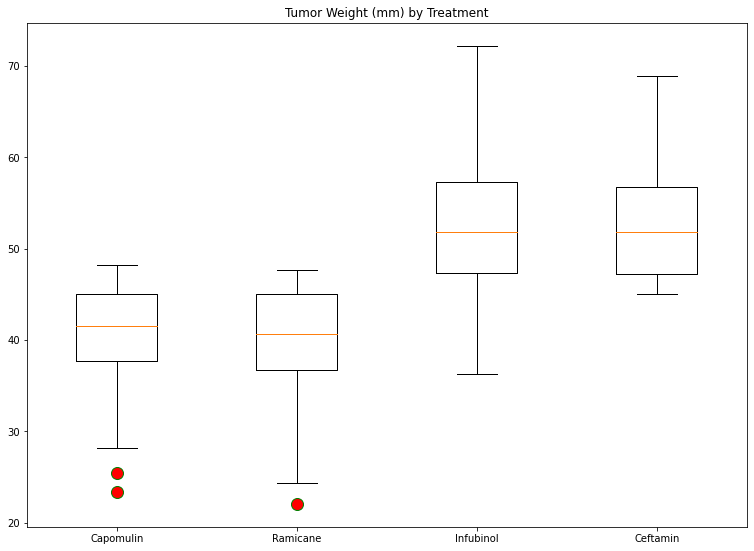

In [313]:
Drug=['Capomulin', 'Ramicane', 'Infubinol',  'Ceftamin']
Camp_list=[]
Ram_list=[]
INF_list=[]
Ceft_list=[]

Camp=df_merge.loc[df_merge["Drug Regimen"]=="Capomulin"]

Camp_ls=Camp.iloc[:,6].tolist()
Camp_list= [float(item) for item in Camp_ls ]

Ram=df_merge.loc[df_merge["Drug Regimen"]=="Ramicane"]

Ram_ls=Ram.iloc[:,6].tolist()
Ram_list= [float(item) for item in Ram_ls ]

INF=df_merge.loc[df_merge["Drug Regimen"]=="Infubinol"]
INF_ls=INF.iloc[:,6].tolist()
INF_list= [float(item) for item in INF_ls ]

Ceft=df_merge.loc[df_merge["Drug Regimen"]=="Ceftamin"]
Ceft_ls=Ceft.iloc[:,6].tolist()
Ceft_list= [float(item) for item in Ceft_ls ]

data = [Camp_list,
Ram_list,
INF_list,
Ceft_list]

fig = plt.figure(figsize =(10, 7)) 
  
# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1]) 
  
# Creating plot 
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='g')
bp = ax.boxplot(data,flierprops=flierprops) 
plt.title("Tumor Weight (mm) by Treatment") 
ax.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol',  'Ceftamin']) 
# show plot 
plt.show() 


## Line and Scatter Plots

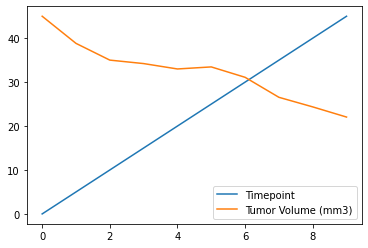

In [211]:

# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

tumor_growth = df_merge[df_merge["Mouse ID"].isin(["k403"])]
tumor_growth

tumor_growth_data = tumor_growth[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
tumor_growth_data

line_plot_df = tumor_growth_data.reset_index()
line_plot_df

line_plot_final = line_plot_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
line_plot_final

lines = line_plot_final.plot.line()

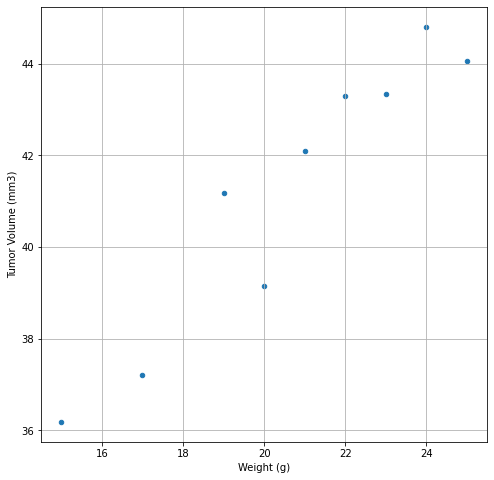

In [190]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#you need to slice the data into the right grouings 
Camp=df_merge.loc[df_merge["Drug Regimen"]=="Capomulin"]
Camp.head()
# group by the the parameters you 're asking questions about. In this case weight vs teh mean of tumor volume'
grouped_weight = Camp.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()
# you need to turn your grouped data back into a data frame
grouped_df = pd.DataFrame(grouped_weight).reset_index()

#make your graph 
scatter =grouped_df.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (8,8))
plt.show()

## Correlation and Regression

The r-squared is: 0.9034966277438602


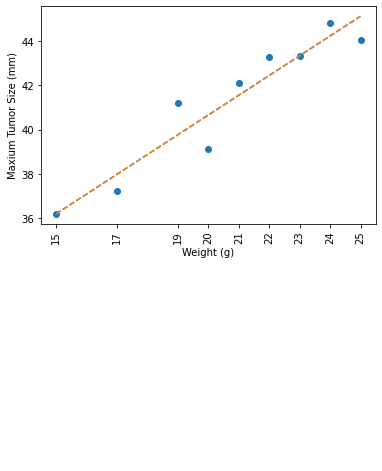

In [244]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#you need to slice the data into the right grouings 
Camp=df_merge.loc[df_merge["Drug Regimen"]=="Capomulin"]
Camp.head()
# group by the the parameters you 're asking questions about. In this case weight vs teh mean of tumor volume'
grouped_weight = Camp.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()
# you need to turn your grouped data back into a data frame
grouped_df = pd.DataFrame(grouped_weight).reset_index()


#linear regression

tw_slope, tw_int, vw_r, vc_p, tw_std_err = st.linregress(grouped_df['Weight (g)'],grouped_df['Tumor Volume (mm3)'] )

# Create equation of line to calculate predicted violent crime rate
tw_fit = tw_slope * grouped_df['Weight (g)'] + tw_int

#plot the line

plt.plot(grouped_df['Weight (g)'],tw_fit,"--")

#make your graph 
line_eq = "y = " + str(round(tw_slope,2)) + "x + " + str(round(tw_int,2))
plt.scatter(grouped_df['Weight (g)'],grouped_df['Tumor Volume (mm3)'] ) 
plt.plot(grouped_df['Weight (g)'],tw_fit,"--")
plt.xticks(grouped_df['Weight (g)'], rotation=90)
plt.annotate(line_eq,(20,25),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Maxium Tumor Size (mm)')
print(f"The r-squared is: {vw_r**2}")

plt.show()



In [ ]:
# Observations:
# 1.Tumor size and weight share a high correlative relationship as evidenced by the r-squared value of .9. 
# 2.Mice in the Capomulin and Ramicane groups had lower tumor weights relative to the Infubinol and Ceftamin groups. 
# 3.The sexes were evenly distributed in the total cohort of mice. 

